In [2]:
import time
import math
import numpy as np
from math import *
import scipy.sparse
import scipy.sparse.linalg
import scipy.linalg
import matplotlib.pyplot as plt

In [517]:
# eps = 0.01
# delta = 0.01
# nu = 8.9*(10**(-4))
b = math.inf
# N = 16


N = 16
nu = 0.0008
eps = 0.01
# nu = 0.001   8.9*10**(-3)
# eps = 0.01   0.001
delta = 0.01 
 
T = 25


u_prev = np.zeros((N,N+1))
v_prev = np.zeros((N+1,N))
p_prev = np.zeros((N*N))


In [518]:
L = 1
t = 0
# T = 3
h = L / N
alpha_p = h

In [519]:
A = np.zeros((N*N,N*N))

for i in range(N):
    for j in range(N):
        ij = i*N+j
        counter = 0
        
        if i!= 0:  # верхняя граница

            A[ij][ij - N] = -1
            A[ij][ij] += 1
            counter += 1
            
        if j  != 0:  # левая

            A[ij][ij - 1] = -1
            counter += 1
            
        if j!= N-1:  # правая

            A[ij][ij + 1] = -1
            counter += 1
            
        if i!= N-1:  # нижняя

            A[ij][ij + N] = -1
            counter += 1
        
        A[ij][ij] = counter
        
print(A)    


[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  3. -1. ...  0.  0.  0.]
 [ 0. -1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3. -1.  0.]
 [ 0.  0.  0. ... -1.  3. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


In [520]:
def solver(A, b):
    p_corr = np.linalg.solve(A, b)  # A, b/delta
    return p_corr

In [521]:
def div(u,v,h):
    b = np.zeros(N * N)
    for i in range(N):
        for j in range(N):
            ij = i*N + j
            b[ij] = h*(u[i][j+1] - u[i][j] + v[i+1][j] - v[i][j])
            
    return b

In [522]:
def solve_uv(u_prev, v_prev, p_prev, N, dt, h, nu):
    u_new = np.zeros((N, N + 1)) 
    v_new = np.zeros((N + 1, N)) 
    
    for i in range (0, N):   
        for j in range (1, N): 
            uc = u_prev[i][j]
            vwn = v_prev[i][j - 1]
            vne = v_prev[i][j]
            vws = v_prev[i + 1][j - 1]
            ves = v_prev[i + 1][j]

            if i == 0:
                un = 2 - uc
            else:
                un = u_prev[i - 1][j]

            if i == (N-1):
                us = - uc
            else:
                us = u_prev[i + 1][j]

            if j == 0:
                uw = - uc
            else:
                uw = u_prev[i][j - 1]

            if j == N:
                ue = - uc
            else:
                ue = u_prev[i][j + 1]
                
                
            pe = p_prev[i * N + j]
            pw = p_prev[i * N + j - 1]
                
            gradU = 0.25 / h * ((uc + ue) * (uc + ue) - (uw + uc) * (uw + uc) - (vwn + vne) * (un + uc) + (vws + ves) * (us + uc) )

            u_new[i, j] = uc - dt * (gradU + nu / (h ** 2) * (4 * uc - uw - ue - us - un) + (pe - pw) / h)
              
                

    for i in range (1, N):   # 0 1 2
        for j in range (0, N):
            vc = v_prev[i][j]
            vn = v_prev[i-1][j]
            vs = v_prev[i+1][j]
            uwn = u_prev[i-1][j]
            uws = u_prev[i][j]
            une = u_prev[i-1][j+1]
            ues = u_prev[i][j+1]

            if (j == 0):
                vw = - vc
            else:
                vw = v_prev[i][j-1]
            if (j == N - 1):
                ve = - vc
            else:        
                ve = v_prev[i][j+1]
                
            pn = p_prev[(i - 1) * N + j]
            ps = p_prev[i * N + j]
            gradV = 0.25 / h * ((une + ues) * (ve + vc) - (uwn + uws) * (vc + vw) - ((vn + vc))**  2 + ((vs + vc)) ** 2 )
            v_new[i, j] = vc - dt * (gradV + nu / h ** 2 * (4 * vc - vw - ve - vs - vn) + (ps - pn) / h)
        
    return(u_new, v_new)


0.0003620386719675124
iterations  <built-in function iter>
t:  0.01
0.0007211123294192937
iterations  <built-in function iter>
t:  0.02
0.0010772512678362569
iterations  <built-in function iter>
t:  0.03
0.0014304875248789461
iterations  <built-in function iter>
t:  0.04
0.0017808563332779828
iterations  <built-in function iter>
t:  0.05
0.0021283974607786914
iterations  <built-in function iter>
t:  0.060000000000000005
0.0024731564423777284
iterations  <built-in function iter>
t:  0.07
0.002815185709773788
iterations  <built-in function iter>
t:  0.08
0.0031545456226275115
iterations  <built-in function iter>
t:  0.09
0.003491305405895311
iterations  <built-in function iter>
t:  0.09999999999999999
0.0038255439971744787
iterations  <built-in function iter>
t:  0.10999999999999999
0.004157350807677782
iterations  <built-in function iter>
t:  0.11999999999999998
0.004486826400148721
iterations  <built-in function iter>
t:  0.12999999999999998
0.004814083086736538
iterations  <built-in f

0.004119259511769699
iterations  <built-in function iter>
t:  1.2000000000000008
0.004228137928887583
iterations  <built-in function iter>
t:  1.2100000000000009
0.004366661556028032
iterations  <built-in function iter>
t:  1.2200000000000009
0.00453310109196452
iterations  <built-in function iter>
t:  1.2300000000000009
0.004725533213014997
iterations  <built-in function iter>
t:  1.2400000000000009
0.004941981051477069
iterations  <built-in function iter>
t:  1.2500000000000009
0.005180522297864803
iterations  <built-in function iter>
t:  1.260000000000001
0.005439362295600849
iterations  <built-in function iter>
t:  1.270000000000001
0.005716876036553843
iterations  <built-in function iter>
t:  1.280000000000001
0.006011625927406443
iterations  <built-in function iter>
t:  1.290000000000001
0.006322362575570467
iterations  <built-in function iter>
t:  1.300000000000001
0.006648014835850708
iterations  <built-in function iter>
t:  1.310000000000001
0.006987673872926949
iterations  <b

0.007733204124812543
iterations  <built-in function iter>
t:  2.259999999999996
0.007376649380611855
iterations  <built-in function iter>
t:  2.2699999999999956
0.007028373078458153
iterations  <built-in function iter>
t:  2.2799999999999954
0.006689978194459121
iterations  <built-in function iter>
t:  2.289999999999995
0.006363316313001185
iterations  <built-in function iter>
t:  2.299999999999995
0.006050510593622649
iterations  <built-in function iter>
t:  2.3099999999999947
0.005753972120565264
iterations  <built-in function iter>
t:  2.3199999999999945
0.00547640265375556
iterations  <built-in function iter>
t:  2.3299999999999943
0.00522077365286906
iterations  <built-in function iter>
t:  2.339999999999994
0.004990268442935438
iterations  <built-in function iter>
t:  2.349999999999994
0.004788173129327565
iterations  <built-in function iter>
t:  2.3599999999999937
0.0046177049927041795
iterations  <built-in function iter>
t:  2.3699999999999934
0.004481777618086668
iterations  <

0.008978146604729816
iterations  <built-in function iter>
t:  3.4099999999999713
0.008651881558153014
iterations  <built-in function iter>
t:  3.419999999999971
0.00831377070638974
iterations  <built-in function iter>
t:  3.429999999999971
0.007967845042796075
iterations  <built-in function iter>
t:  3.4399999999999706
0.007618908713556606
iterations  <built-in function iter>
t:  3.4499999999999704
0.007272641585364904
iterations  <built-in function iter>
t:  3.45999999999997
0.006935699450280466
iterations  <built-in function iter>
t:  3.46999999999997
0.006615783886199695
iterations  <built-in function iter>
t:  3.47999999999997
0.006321632642644002
iterations  <built-in function iter>
t:  3.4899999999999696
0.00606285654994751
iterations  <built-in function iter>
t:  3.4999999999999694
0.005849532577721994
iterations  <built-in function iter>
t:  3.509999999999969
0.005691480614966227
iterations  <built-in function iter>
t:  3.519999999999969
0.005597235783101096
iterations  <built-

0.010048892934927247
0.009420837126494294
iterations  <built-in function iter>
t:  4.42999999999995
0.009015064078531395
iterations  <built-in function iter>
t:  4.43999999999995
0.008603229876256079
iterations  <built-in function iter>
t:  4.4499999999999496
0.008188664162974353
iterations  <built-in function iter>
t:  4.459999999999949
0.007775318489223341
iterations  <built-in function iter>
t:  4.469999999999949
0.007367864120490087
iterations  <built-in function iter>
t:  4.479999999999949
0.0069717955460925395
iterations  <built-in function iter>
t:  4.489999999999949
0.006593522798459277
iterations  <built-in function iter>
t:  4.4999999999999485
0.0062404198291970995
iterations  <built-in function iter>
t:  4.509999999999948
0.00592077353759301
iterations  <built-in function iter>
t:  4.519999999999948
0.005643553469831224
iterations  <built-in function iter>
t:  4.529999999999948
0.005417912203779635
iterations  <built-in function iter>
t:  4.539999999999948
0.0052523623416282

0.006993182069405775
iterations  <built-in function iter>
t:  5.479999999999928
0.006687452164084118
iterations  <built-in function iter>
t:  5.489999999999927
0.006402863647649363
iterations  <built-in function iter>
t:  5.499999999999927
0.006147023579100255
iterations  <built-in function iter>
t:  5.509999999999927
0.005927939847091126
iterations  <built-in function iter>
t:  5.519999999999927
0.005753583882797491
iterations  <built-in function iter>
t:  5.5299999999999265
0.0056312483904765055
iterations  <built-in function iter>
t:  5.539999999999926
0.005566763945678029
iterations  <built-in function iter>
t:  5.549999999999926
0.005563734696676702
iterations  <built-in function iter>
t:  5.559999999999926
0.005623013154035825
iterations  <built-in function iter>
t:  5.569999999999926
0.005742594070913267
iterations  <built-in function iter>
t:  5.5799999999999255
0.005917964052262751
iterations  <built-in function iter>
t:  5.589999999999925
0.006142777898518714
iterations  <bui

0.008956133052095798
iterations  <built-in function iter>
t:  6.709999999999901
0.009294372088543749
iterations  <built-in function iter>
t:  6.719999999999901
0.00962107244571704
iterations  <built-in function iter>
t:  6.729999999999901
0.009934625329520774
iterations  <built-in function iter>
t:  6.739999999999901
0.010233737917366348
0.009594129297530948
iterations  <built-in function iter>
t:  6.7499999999999005
0.009237822126369357
iterations  <built-in function iter>
t:  6.7599999999999
0.008867677060761569
iterations  <built-in function iter>
t:  6.7699999999999
0.008486109661805737
iterations  <built-in function iter>
t:  6.7799999999999
0.008096044055067869
iterations  <built-in function iter>
t:  6.7899999999999
0.0077009972734208365
iterations  <built-in function iter>
t:  6.7999999999998995
0.007305184061834672
iterations  <built-in function iter>
t:  6.809999999999899
0.006913641820779801
iterations  <built-in function iter>
t:  6.819999999999899
0.006532369107173346
iter

0.007509408603990724
iterations  <built-in function iter>
t:  7.779999999999879
0.007221720070854014
iterations  <built-in function iter>
t:  7.789999999999878
0.006940986534537803
iterations  <built-in function iter>
t:  7.799999999999878
0.0066710272851647255
iterations  <built-in function iter>
t:  7.809999999999878
0.006416128755120301
iterations  <built-in function iter>
t:  7.819999999999878
0.006181005840233453
iterations  <built-in function iter>
t:  7.8299999999998775
0.005970705615675189
iterations  <built-in function iter>
t:  7.839999999999877
0.005790432910304954
iterations  <built-in function iter>
t:  7.849999999999877
0.005645284041253954
iterations  <built-in function iter>
t:  7.859999999999877
0.005539893410648606
iterations  <built-in function iter>
t:  7.869999999999877
0.005478027782690407
iterations  <built-in function iter>
t:  7.879999999999876
0.005462196570306845
iterations  <built-in function iter>
t:  7.889999999999876
0.005493366039317831
iterations  <buil

0.007495589218863938
iterations  <built-in function iter>
t:  8.989999999999853
0.007853683063812617
iterations  <built-in function iter>
t:  8.999999999999853
0.008216953994946317
iterations  <built-in function iter>
t:  9.009999999999852
0.008582213023909343
iterations  <built-in function iter>
t:  9.019999999999852
0.008946746989187364
iterations  <built-in function iter>
t:  9.029999999999852
0.00930826674370599
iterations  <built-in function iter>
t:  9.039999999999852
0.009664861101398553
iterations  <built-in function iter>
t:  9.049999999999851
0.010014957462307997
0.009389022620913746
iterations  <built-in function iter>
t:  9.059999999999851
0.009107438829090646
iterations  <built-in function iter>
t:  9.069999999999851
0.008821658487726711
iterations  <built-in function iter>
t:  9.07999999999985
0.008533554134701788
iterations  <built-in function iter>
t:  9.08999999999985
0.008245345864400323
iterations  <built-in function iter>
t:  9.09999999999985
0.007959625243696705
it

0.009641599885899275
iterations  <built-in function iter>
t:  10.06999999999983
0.009344426330423702
iterations  <built-in function iter>
t:  10.07999999999983
0.009043605004670906
iterations  <built-in function iter>
t:  10.08999999999983
0.008741376625126768
iterations  <built-in function iter>
t:  10.09999999999983
0.008440309907159231
iterations  <built-in function iter>
t:  10.109999999999829
0.008143322662935071
iterations  <built-in function iter>
t:  10.119999999999829
0.007853697823446543
iterations  <built-in function iter>
t:  10.129999999999828
0.007575088832473053
iterations  <built-in function iter>
t:  10.139999999999828
0.007311506240795861
iterations  <built-in function iter>
t:  10.149999999999828
0.007067274564022328
iterations  <built-in function iter>
t:  10.159999999999828
0.006846946467136265
iterations  <built-in function iter>
t:  10.169999999999828
0.006655161709185038
iterations  <built-in function iter>
t:  10.179999999999827
0.006496443180246082
iterations 

0.008637942026302562
iterations  <built-in function iter>
t:  11.089999999999808
0.008327609394321997
iterations  <built-in function iter>
t:  11.099999999999808
0.008020845847701854
iterations  <built-in function iter>
t:  11.109999999999808
0.007720528814710163
iterations  <built-in function iter>
t:  11.119999999999807
0.007429918357200879
iterations  <built-in function iter>
t:  11.129999999999807
0.007152657126866652
iterations  <built-in function iter>
t:  11.139999999999807
0.006892747220739481
iterations  <built-in function iter>
t:  11.149999999999807
0.006654491593106624
iterations  <built-in function iter>
t:  11.159999999999807
0.006442386153543588
iterations  <built-in function iter>
t:  11.169999999999806
0.0062609504765272685
iterations  <built-in function iter>
t:  11.179999999999806
0.006114492628213585
iterations  <built-in function iter>
t:  11.189999999999806
0.006006818560269513
iterations  <built-in function iter>
t:  11.199999999999806
0.005940917279897867
iterat

0.008143462833802554
iterations  <built-in function iter>
t:  12.099999999999786
0.00781345206642365
iterations  <built-in function iter>
t:  12.109999999999786
0.007489718513263816
iterations  <built-in function iter>
t:  12.119999999999786
0.007176070463059986
iterations  <built-in function iter>
t:  12.129999999999786
0.006876836646058222
iterations  <built-in function iter>
t:  12.139999999999786
0.006596858904822392
iterations  <built-in function iter>
t:  12.149999999999785
0.006341435606408879
iterations  <built-in function iter>
t:  12.159999999999785
0.006116190351739764
iterations  <built-in function iter>
t:  12.169999999999785
0.005926841045572454
iterations  <built-in function iter>
t:  12.179999999999785
0.005778856245039584
iterations  <built-in function iter>
t:  12.189999999999785
0.005677013752339608
iterations  <built-in function iter>
t:  12.199999999999784
0.005624918300962364
iterations  <built-in function iter>
t:  12.209999999999784
0.005624575449783585
iteratio

0.007754520374291256
iterations  <built-in function iter>
t:  13.30999999999976
0.008089506167180209
iterations  <built-in function iter>
t:  13.31999999999976
0.008427408625264018
iterations  <built-in function iter>
t:  13.32999999999976
0.008765134456700671
iterations  <built-in function iter>
t:  13.33999999999976
0.009100039629090558
iterations  <built-in function iter>
t:  13.34999999999976
0.00942988196191259
iterations  <built-in function iter>
t:  13.35999999999976
0.009752779102697832
iterations  <built-in function iter>
t:  13.36999999999976
0.0100671730689303
0.009437974752122153
iterations  <built-in function iter>
t:  13.37999999999976
0.00911346058667848
iterations  <built-in function iter>
t:  13.389999999999759
0.008780973462445663
iterations  <built-in function iter>
t:  13.399999999999759
0.008442627864552334
iterations  <built-in function iter>
t:  13.409999999999759
0.008100964720651223
iterations  <built-in function iter>
t:  13.419999999999758
0.00775900701566598

0.006343595651022536
iterations  <built-in function iter>
t:  14.579999999999734
0.006617269062867099
iterations  <built-in function iter>
t:  14.589999999999733
0.006914211249357471
iterations  <built-in function iter>
t:  14.599999999999733
0.007229316561991139
iterations  <built-in function iter>
t:  14.609999999999733
0.007557962157603438
iterations  <built-in function iter>
t:  14.619999999999733
0.0078960434126561
iterations  <built-in function iter>
t:  14.629999999999733
0.008239967804137846
iterations  <built-in function iter>
t:  14.639999999999732
0.008586626390212898
iterations  <built-in function iter>
t:  14.649999999999732
0.008933355697609294
iterations  <built-in function iter>
t:  14.659999999999732
0.009277897704641058
iterations  <built-in function iter>
t:  14.669999999999732
0.009618361993478118
iterations  <built-in function iter>
t:  14.679999999999731
0.009953191819462644
iterations  <built-in function iter>
t:  14.689999999999731
0.010281134466891516
0.0096385

0.00807779236111065
iterations  <built-in function iter>
t:  15.70999999999971
0.007762906501491553
iterations  <built-in function iter>
t:  15.71999999999971
0.007454361910869074
iterations  <built-in function iter>
t:  15.729999999999709
0.007156616639885487
iterations  <built-in function iter>
t:  15.739999999999709
0.006874714624170495
iterations  <built-in function iter>
t:  15.749999999999709
0.006614254077182451
iterations  <built-in function iter>
t:  15.759999999999708
0.006381286053122333
iterations  <built-in function iter>
t:  15.769999999999708
0.006182112896987015
iterations  <built-in function iter>
t:  15.779999999999708
0.006022963178327333
iterations  <built-in function iter>
t:  15.789999999999708
0.0059095434490284825
iterations  <built-in function iter>
t:  15.799999999999708
0.005846509616964742
iterations  <built-in function iter>
t:  15.809999999999707
0.005836950709586075
iterations  <built-in function iter>
t:  15.819999999999707
0.005882008869438155
iteration

0.009556826037745977
iterations  <built-in function iter>
t:  16.95999999999985
0.00923088615562858
iterations  <built-in function iter>
t:  16.969999999999853
0.008896999699548538
iterations  <built-in function iter>
t:  16.979999999999855
0.008557022696845325
iterations  <built-in function iter>
t:  16.989999999999856
0.008213238641641123
iterations  <built-in function iter>
t:  16.999999999999858
0.00786841221710773
iterations  <built-in function iter>
t:  17.00999999999986
0.007525849318449327
iterations  <built-in function iter>
t:  17.01999999999986
0.007189460118338281
iterations  <built-in function iter>
t:  17.029999999999863
0.006863817723045775
iterations  <built-in function iter>
t:  17.039999999999864
0.00655419824581886
iterations  <built-in function iter>
t:  17.049999999999866
0.006266578509303753
iterations  <built-in function iter>
t:  17.059999999999867
0.006007556113928276
iterations  <built-in function iter>
t:  17.06999999999987
0.005784147471520779
iterations  <b

0.010101685880300821
0.009470330512782019
iterations  <built-in function iter>
t:  18.24000000000005
0.009179786317631859
iterations  <built-in function iter>
t:  18.250000000000053
0.008880446562609895
iterations  <built-in function iter>
t:  18.260000000000055
0.008574178189698365
iterations  <built-in function iter>
t:  18.270000000000056
0.00826326770341967
iterations  <built-in function iter>
t:  18.280000000000058
0.007950464911629894
iterations  <built-in function iter>
t:  18.29000000000006
0.007639029239485973
iterations  <built-in function iter>
t:  18.30000000000006
0.007332775092950935
iterations  <built-in function iter>
t:  18.310000000000063
0.0070361091000083
iterations  <built-in function iter>
t:  18.320000000000064
0.0067540465843101945
iterations  <built-in function iter>
t:  18.330000000000066
0.006492187430213424
iterations  <built-in function iter>
t:  18.340000000000067
0.0062566238835851575
iterations  <built-in function iter>
t:  18.35000000000007
0.0060537483

0.005662126237961577
iterations  <built-in function iter>
t:  19.340000000000224
0.005561190491116016
iterations  <built-in function iter>
t:  19.350000000000225
0.005515778196061039
iterations  <built-in function iter>
t:  19.360000000000227
0.005528034272280842
iterations  <built-in function iter>
t:  19.37000000000023
0.005597678139534536
iterations  <built-in function iter>
t:  19.38000000000023
0.005722059630967819
iterations  <built-in function iter>
t:  19.39000000000023
0.005896559413666704
iterations  <built-in function iter>
t:  19.400000000000233
0.006115201842602855
iterations  <built-in function iter>
t:  19.410000000000235
0.006371308936061012
iterations  <built-in function iter>
t:  19.420000000000236
0.006658060916798492
iterations  <built-in function iter>
t:  19.430000000000238
0.0069688996510198446
iterations  <built-in function iter>
t:  19.44000000000024
0.00729777299075441
iterations  <built-in function iter>
t:  19.45000000000024
0.007639251768661207
iterations  

0.006443066256418325
iterations  <built-in function iter>
t:  20.360000000000383
0.006735253370679941
iterations  <built-in function iter>
t:  20.370000000000385
0.007054950571848892
iterations  <built-in function iter>
t:  20.380000000000386
0.007395624736344067
iterations  <built-in function iter>
t:  20.390000000000388
0.007751339082887176
iterations  <built-in function iter>
t:  20.40000000000039
0.008116815151010613
iterations  <built-in function iter>
t:  20.41000000000039
0.008487428301105816
iterations  <built-in function iter>
t:  20.420000000000393
0.008859167679395031
iterations  <built-in function iter>
t:  20.430000000000394
0.009228581224105345
iterations  <built-in function iter>
t:  20.440000000000396
0.009592717952460998
iterations  <built-in function iter>
t:  20.450000000000397
0.009949074022641972
iterations  <built-in function iter>
t:  20.4600000000004
0.010295545473595557
0.009652073881495835
iterations  <built-in function iter>
t:  20.4700000000004
0.00934224251

0.00939730043453933
iterations  <built-in function iter>
t:  21.390000000000544
0.009752285994408997
iterations  <built-in function iter>
t:  21.400000000000546
0.010099443364597782
0.00946822815431042
iterations  <built-in function iter>
t:  21.410000000000547
0.009174416285080492
iterations  <built-in function iter>
t:  21.42000000000055
0.008872456494488338
iterations  <built-in function iter>
t:  21.43000000000055
0.008564316151619625
iterations  <built-in function iter>
t:  21.440000000000552
0.008252363411270842
iterations  <built-in function iter>
t:  21.450000000000554
0.007939410711279633
iterations  <built-in function iter>
t:  21.460000000000555
0.007628760294124359
iterations  <built-in function iter>
t:  21.470000000000557
0.0073242473975588685
iterations  <built-in function iter>
t:  21.480000000000558
0.007030272991710118
iterations  <built-in function iter>
t:  21.49000000000056
0.0067518125795384375
iterations  <built-in function iter>
t:  21.50000000000056
0.006494380

0.006992386238654084
iterations  <built-in function iter>
t:  22.430000000000707
0.00671497680456178
iterations  <built-in function iter>
t:  22.44000000000071
0.006463112104143089
iterations  <built-in function iter>
t:  22.45000000000071
0.006243694107252518
iterations  <built-in function iter>
t:  22.46000000000071
0.006063727564079683
iterations  <built-in function iter>
t:  22.470000000000713
0.0059298502288816675
iterations  <built-in function iter>
t:  22.480000000000715
0.00584773803566946
iterations  <built-in function iter>
t:  22.490000000000716
0.005821477661977296
iterations  <built-in function iter>
t:  22.500000000000718
0.00585305214798465
iterations  <built-in function iter>
t:  22.51000000000072
0.005942087793731189
iterations  <built-in function iter>
t:  22.52000000000072
0.006085941789097806
iterations  <built-in function iter>
t:  22.530000000000722
0.006280097948626962
iterations  <built-in function iter>
t:  22.540000000000724
0.0065187449605881844
iterations  <

0.007302161392136803
iterations  <built-in function iter>
t:  23.520000000000877
0.00759447492114914
iterations  <built-in function iter>
t:  23.53000000000088
0.007900491867863433
iterations  <built-in function iter>
t:  23.54000000000088
0.008215997931983673
iterations  <built-in function iter>
t:  23.550000000000882
0.00853723355169591
iterations  <built-in function iter>
t:  23.560000000000883
0.008860888987010831
iterations  <built-in function iter>
t:  23.570000000000885
0.009184083101981875
iterations  <built-in function iter>
t:  23.580000000000886
0.009504334339468854
iterations  <built-in function iter>
t:  23.590000000000888
0.009819529188899521
iterations  <built-in function iter>
t:  23.60000000000089
0.010127891161923534
0.009494897964303313
iterations  <built-in function iter>
t:  23.61000000000089
0.009162959301665172
iterations  <built-in function iter>
t:  23.620000000000893
0.008826079789348282
iterations  <built-in function iter>
t:  23.630000000000894
0.00848705335

0.006381669101175096
iterations  <built-in function iter>
t:  24.69000000000106
0.006526153853721935
iterations  <built-in function iter>
t:  24.70000000000106
0.006708814967512335
iterations  <built-in function iter>
t:  24.710000000001063
0.006925354786903919
iterations  <built-in function iter>
t:  24.720000000001065
0.007171092872568797
iterations  <built-in function iter>
t:  24.730000000001066
0.007441242396710999
iterations  <built-in function iter>
t:  24.740000000001068
0.007731120612034679
iterations  <built-in function iter>
t:  24.75000000000107
0.008036291757142811
iterations  <built-in function iter>
t:  24.76000000000107
0.008352652093778112
iterations  <built-in function iter>
t:  24.770000000001072
0.008676471126440467
iterations  <built-in function iter>
t:  24.780000000001074
0.009004402802740374
iterations  <built-in function iter>
t:  24.790000000001076
0.009333478026114134
iterations  <built-in function iter>
t:  24.800000000001077
0.009661086778388934
iterations 

0.009524574158446483
iterations  <built-in function iter>
t:  25.750000000001226
0.00922685069679069
iterations  <built-in function iter>
t:  25.760000000001227
0.008923105899825161
iterations  <built-in function iter>
t:  25.77000000000123
0.008615724623167722
iterations  <built-in function iter>
t:  25.78000000000123
0.008307519530043172
iterations  <built-in function iter>
t:  25.790000000001232
0.00800176735211005
iterations  <built-in function iter>
t:  25.800000000001234
0.007702240411788578
iterations  <built-in function iter>
t:  25.810000000001235
0.007413225778422104
iterations  <built-in function iter>
t:  25.820000000001237
0.007139520122593847
iterations  <built-in function iter>
t:  25.830000000001238
0.0068863833506407355
iterations  <built-in function iter>
t:  25.84000000000124
0.006659429863243104
iterations  <built-in function iter>
t:  25.85000000000124
0.006464435692668122
iterations  <built-in function iter>
t:  25.860000000001243
0.0063070471659905595
iterations 

0.007601142855360419
iterations  <built-in function iter>
t:  26.910000000001407
0.007939054352947497
iterations  <built-in function iter>
t:  26.92000000000141
0.008287436092520084
iterations  <built-in function iter>
t:  26.93000000000141
0.00864188646900997
iterations  <built-in function iter>
t:  26.94000000000141
0.00899854817413005
iterations  <built-in function iter>
t:  26.950000000001413
0.009354073689130799
iterations  <built-in function iter>
t:  26.960000000001415
0.009705583489102809
iterations  <built-in function iter>
t:  26.970000000001416
0.010050623617164871
0.00942245964109207
iterations  <built-in function iter>
t:  26.980000000001418
0.009130897033743975
iterations  <built-in function iter>
t:  26.99000000000142
0.008832772927819628
iterations  <built-in function iter>
t:  27.00000000000142
0.008530345951230466
iterations  <built-in function iter>
t:  27.010000000001423
0.008226293875230287
iterations  <built-in function iter>
t:  27.020000000001424
0.0079237523667

0.007913689038936954
iterations  <built-in function iter>
t:  28.160000000001602
0.008248710069727824
iterations  <built-in function iter>
t:  28.170000000001604
0.0085880888546543
iterations  <built-in function iter>
t:  28.180000000001606
0.008928012093505648
iterations  <built-in function iter>
t:  28.190000000001607
0.009265173860645518
iterations  <built-in function iter>
t:  28.20000000000161
0.009596737202659614
iterations  <built-in function iter>
t:  28.21000000000161
0.009920294838540839
iterations  <built-in function iter>
t:  28.220000000001612
0.010233832103991243
0.009594217597491789
iterations  <built-in function iter>
t:  28.230000000001613
0.009257441683235456
iterations  <built-in function iter>
t:  28.240000000001615
0.0089121815494596
iterations  <built-in function iter>
t:  28.250000000001616
0.008561102099773218
iterations  <built-in function iter>
t:  28.260000000001618
0.008207374388554409
iterations  <built-in function iter>
t:  28.27000000000162
0.007854737954

0.010178118664419063
0.009541986247892872
iterations  <built-in function iter>
t:  29.460000000001806
0.009232923310060424
iterations  <built-in function iter>
t:  29.470000000001807
0.008914815454240005
iterations  <built-in function iter>
t:  29.48000000000181
0.008589919408306045
iterations  <built-in function iter>
t:  29.49000000000181
0.008260949450216224
iterations  <built-in function iter>
t:  29.500000000001812
0.007931131276299878
iterations  <built-in function iter>
t:  29.510000000001813
0.007604259696950729
iterations  <built-in function iter>
t:  29.520000000001815
0.0072847543598612225
iterations  <built-in function iter>
t:  29.530000000001817
0.0069777023383772565
iterations  <built-in function iter>
t:  29.540000000001818
0.006688868693702478
iterations  <built-in function iter>
t:  29.55000000000182
0.006424646521428228
iterations  <built-in function iter>
t:  29.56000000000182
0.006191909128055031
iterations  <built-in function iter>
t:  29.570000000001823
0.0059977

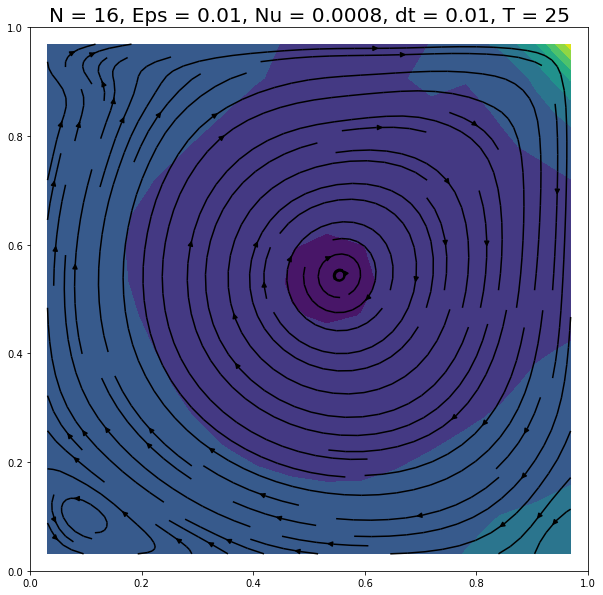

In [523]:
check = True

stop_iter = 0.001


while check:
    p_new = p_prev
    counter = 0
    iterations = 0
    norm_b = math.inf  
    while norm_b > eps and t<30:
        u_new, v_new = solve_uv(u_prev, v_prev, p_new, N, delta, h, nu)
        b = - div(u_new, v_new, h)
        norm_b = np.linalg.norm(b)
        print(norm_b)
        if norm_b > eps:
            p_сorr = solver(A, b/delta)
            p_new = p_new + p_сorr*alpha_p
            p_new-=np.mean(p_new)
            iterations += 1        
            
            
    if np.linalg.norm(u_new - u_prev) < stop_iter and np.linalg.norm(v_new - v_prev) < stop_iter and t > 1:
        check = False
        
    u_prev, v_prev = u_new, v_new
    p_prev = p_new
    t += delta
    
    
    
    print("iterations ", iter)
    print('t: ', t)
    

plot_solution(u_prev, v_prev, p_prev, delta)  

In [289]:
def plot_solution(u, v, p, dt,streamplot=True):
        u = (u[:, :-1] + u[:, 1:]) / 2
        v = (v[1:, :] + v[:-1, :]) / 2
        print(u.shape)
        u = u[::-1, ::]
        v = -v[::-1, ::]
        p=p.reshape((N,N))[::-1,::]
        x = np.arange(h / 2, 1, h)
        y = np.arange(h / 2, 1, h)
        grid_x, grid_y = np.meshgrid(x, y)
        fig = plt.figure(figsize=(10, 10))
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.streamplot(grid_x, grid_y, u, v, color='black')
        plt.contourf(grid_x, grid_y, p.reshape((N, N)))
        plt.title(f"N = {N}, Eps = {eps}, Nu = {nu}, dt = {dt}, T = {T}", fontsize=20)
        plt.savefig('output.png')


(16, 16)


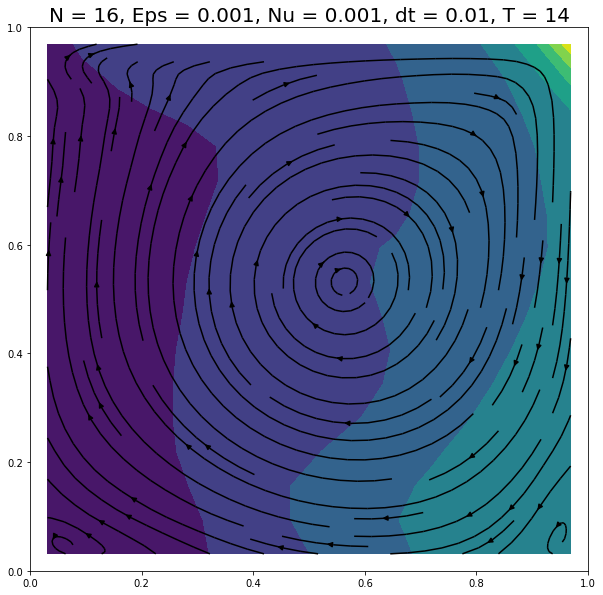

In [337]:
# alpha = 0.5
alpha_p = 0.8
while t < T:
    p_new = p_prev
    counter = 0
    iterations = 0
    norm_b = math.inf  
    while norm_b > eps:
        u_new, v_new = solve_uv(u_prev, v_prev, p_new, N, delta, h, nu)
#         u_new = alpha*u_new + (1 - alpha) * u_prev
        b = - div(u_new, v_new, h)
        norm_b = np.linalg.norm(b)
        print(norm_b)
        if norm_b > eps:
            p_сorr = solver(A, b/delta)
            p_new = p_new + alpha_p * p_сorr
            iterations += 1

    u_prev, v_prev = u_new, v_new
    p_prev = p_new
    t += delta
    

    print("iterations ", iter)
    print('t: ', t)
    

plot_solution(u_prev, v_prev, p_prev, delta)

In [ ]:
#             u_new[i][j] = uc - dt * (0.25 * (-(uw + uc)**2 + (uc + ue) ** 2 + (vws + ves) * (us + uc) - (vwn + vne) * (un + uc)) / h + nu * (4 * uc - ue - un - us - uw) / h / h + (p_prev[i*N + j] - p_prev[i*N + j - 1]) / h)
  

#             v_new[i][j] = vc - dt * (0.25 *((vn + vc)**2 - (vc + vs) ** 2 + (ve + vc) * (une + ues) - (vc + vw) * (uwn + uws)) / h  + nu * (4 * vc - ve - vn - vs - vw) / h / h + (p_prev[i*N + j] - p_prev[(i-1)*N + j]) / h)
         